<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%206%20-%20Data%20analysis/Final%20Project/Data_Anaysis_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import load_dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

##Data preprocessing
---

In [2]:
"""
load_dataset() is the only function I use from the seaborn library, so I decided to only import it and not the entire library in order to save unnesesery keywords from the global namespace
"""
df = load_dataset('iris')

In [3]:
"""
I chose to use the 'Iris' dataset
The target parametar is the species of the Iris
"""
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
"""
Check if there are any NULLs in the dataset
No NULL values found in this dataset!
Perfetto!
"""
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


##EDA
---

In [5]:
"""
We can see all the information about the dataset.
We can see that most of the data has a datatype of float64.
The only column that is not float is the species column that holds that types of the species. It is dtype object
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
"""
Checking how many species of Irises we have.
We have only 3 species of Irises in the dataset
"""
print(f"species has {df['species'].nunique()} unique values")

species has 3 unique values


In [7]:
"""
Becouse we only have 3 species of Irises, I will change the data type into 'category'.
I'm changing the type to 'category' in order to make working with the data much easier.
"""
df['species'] = df['species'].astype('category')

In [8]:
"""
We can see the 'species' data type has changed to 'category'
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [9]:
# Checking the largest value in the table
df.select_dtypes('number').max()

,0
sepal_length,7.9
sepal_width,4.4
petal_length,6.9
petal_width,2.5


In [10]:
# Checking the largest value in the table
df.select_dtypes('number').min()

,0
sepal_length,4.3
sepal_width,2.0
petal_length,1.0
petal_width,0.1


In [11]:
"""
We can see that the largest number in the dataset is 7.9 and the smallest is 0.1
Thereby, I propose to change the data types of all the float64 column to float16 data type.
The range of number float16 data type can hold is ±65,504 which is more than enough for what we need.
"""
df['sepal_length'] = df['sepal_length'].astype('float16')
df['sepal_width'] = df['sepal_width'].astype('float16')
df['petal_length'] = df['petal_length'].astype('float16')
df['petal_width'] = df['petal_width'].astype('float16')

In [12]:
"""
We can see that changing the data type from float64 to float16 reduced the size of the dataset to 1.6 KB
A reduction of 4.4 KB from the original dataset (origianl size 6.0 KB)
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float16 
 1   sepal_width   150 non-null    float16 
 2   petal_length  150 non-null    float16 
 3   petal_width   150 non-null    float16 
 4   species       150 non-null    category
dtypes: category(1), float16(4)
memory usage: 1.6 KB


In [13]:
"""
Now I will encode the 'species' column using One Hot Encoder
This is done to allow the ML model to procces it
"""
# Create an instance of the encoder
encoder = LabelEncoder()
# Encode the data using LabelEncoder
encoded_species = encoder.fit_transform(df[['species']])
# Put the encoded data in to a dataframe
species_df = pd.DataFrame(encoded_species, columns = ['species'])
# Concatinate the new LabelEncoded column into the dataframe, instead of the old column
df = pd.concat([df.drop(['species'], axis=1), species_df], axis=1)

# Check the results
df

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.101562,3.500000,1.400391,0.199951,0
1,4.898438,3.000000,1.400391,0.199951,0
2,4.699219,3.199219,1.299805,0.199951,0
3,4.601562,3.099609,1.500000,0.199951,0
4,5.000000,3.599609,1.400391,0.199951,0
...,...,...,...,...,...
145,6.699219,3.000000,5.199219,2.300781,2
146,6.300781,2.500000,5.000000,1.900391,2
147,6.500000,3.000000,5.199219,2.000000,2
148,6.199219,3.400391,5.398438,2.300781,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float16
 1   sepal_width   150 non-null    float16
 2   petal_length  150 non-null    float16
 3   petal_width   150 non-null    float16
 4   species       150 non-null    int64  
dtypes: float16(4), int64(1)
memory usage: 2.5 KB


In [15]:
"""
Now after we encoded the 'species' column, I want to chagne the datatype from float64 to float16 to save some space
"""
df['species'] = df['species'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float16
 1   sepal_width   150 non-null    float16
 2   petal_length  150 non-null    float16
 3   petal_width   150 non-null    float16
 4   species       150 non-null    int8   
dtypes: float16(4), int8(1)
memory usage: 1.4 KB


In [16]:
"""
We split the dataframe in to X and y, where X is the input parametars and y is the expected output, a.k.a the target of our model
"""
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['species']]

In [17]:
"""
We need to split the data into training and testing data.
This is done to later use the testing data to check how good our model has trained and how it handles data it has never seen before.
We split the data using train_test_split form the scikit-learn library
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
"""
After splitting the data into training and testing data, we need to standardize it.
This prevents the parameters from getting an uneven representation during model training.
An example of why we want to standardize the data is 4 rooms vs $1,000,000
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Model Buliding
---

In [19]:
"""
As mentioned at the start of the notebook, our classification model aims to identify the species of the Iris flower.
i.e. we need to build a classification model.
I chose to use the K-nearest neighbor and the random forest classification algorithms to do the job.
The reason I chose those 2 classification is becouse they are best fitting to do multi-class classification.
"""
random_forest = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
"""
Let's train the models
"""
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [21]:
"""
Now I will check how accurate the models are
"""
y_pred_random_forest = random_forest.predict(X_test)
y_pred_knn = knn.predict(X_test)

print(f"The accuracy of the random forest model is : {accuracy_score(y_test, y_pred_random_forest)}")
print(f"The accuracy of the K_nearest neighbor model is : {accuracy_score(y_test, y_pred_knn)}")

The accuracy of the random forest model is : 1.0
The accuracy of the K_nearest neighbor model is : 1.0


##Hyperparametar tuning
---

In [22]:
"""
Now I will try to modified the hyperparametars of the KNN model and see how it is changing the result
"""
knn_modified = KNeighborsClassifier(n_neighbors=80)
knn_modified.fit(X_train, y_train)
y_pred_knn_modified = knn_modified.predict(X_test)

print(f"The accuracy of the modified K_nearest neighbor model is : {accuracy_score(y_test, y_pred_knn_modified)}")

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of the modified K_nearest neighbor model is : 0.6333333333333333


##Compering the two models
---

###Confusion Matrix

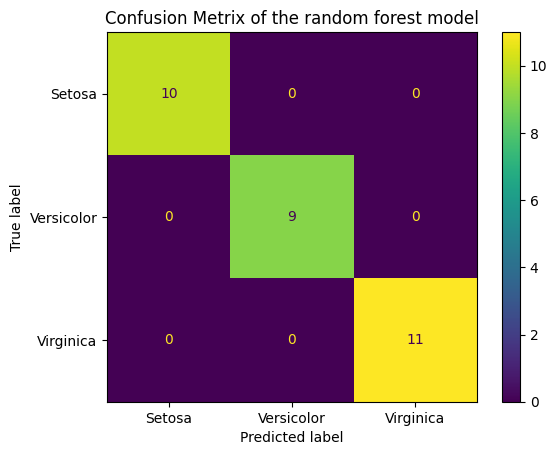

In [23]:
"""
Now I will show the confusion metrix of the random forest model
"""
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
labels = ['Setosa', 'Versicolor', 'Virginica']
display = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest, display_labels=labels)
display.plot()
plt.title("Confusion Metrix of the random forest model")
plt.show()

We can see that the model has predicied all the flower species 100% of the time. No false predictions.

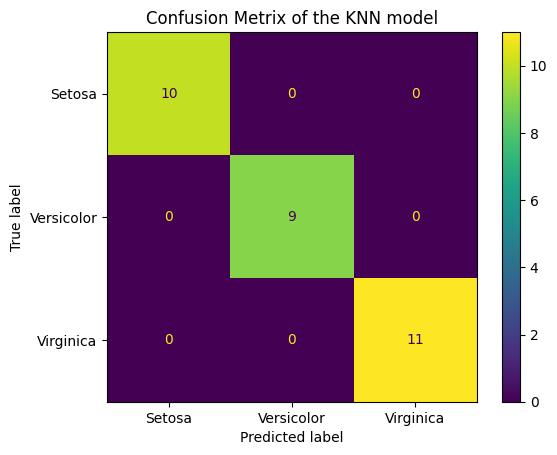

In [24]:
"""
Now I will show the confusion metrix of the K-nearest neighbors model
"""
cm_knn = confusion_matrix(y_test, y_pred_knn)
labels = ['Setosa', 'Versicolor', 'Virginica']
display = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=labels)
display.plot()
plt.title("Confusion Metrix of the KNN model")
plt.show()

In this model we can also see that it predicted all the specues with 100% accuracy. The reason that both models predicted all the species with 100% accuracy may be becouse a small number of samples and very clean data. Otherwise, the results could have been different.

###Classification report

In [25]:
"""
Now I will show the classification report for the random forest model
"""
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)
print(classification_report_random_forest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
"""
Now I will show the classification report for the K-nearest neighbors model
"""
classification_report_knn = classification_report(y_test, y_pred_knn)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We can see that in both models the precision and the recall are 1.0 meaning that both of the models predicted the flower species corrctly 100% of the time. The reason that both models predicted all the species with 100% accuracy may be because of a small number of samples and very clean data. Otherwise, the results could have been different.

#The end